In [2]:
import pandas as pd

In [10]:
df = pd.read_csv("C:\\Users\\Maggy\\OneDrive\\Desktop\\orderdetails..csv")

In [12]:
df

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010


In [14]:
print("Initial Data: ")

Initial Data: 


In [16]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [18]:
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get data types and basic information
print(df.info())

   Order ID User ID  Order Date  Meal Type        Dish Name Order Status  \
0      1001    U001  2024-12-01     Dinner        Spaghetti    Completed   
1      1002    U002  2024-12-01      Lunch     Caesar Salad    Completed   
2      1003    U003  2024-12-02     Dinner  Grilled Chicken     Canceled   
3      1004    U001  2024-12-02  Breakfast         Pancakes    Completed   
4      1005    U004  2024-12-03      Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  
0          15.0       Night     5.0       S001  
1          10.0         Day     4.0       S002  
2          12.5       Night     NaN       S003  
3           8.0     Morning     4.0       S004  
4           9.0         Day     4.0       S005  
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 ent

In [20]:
df['Rating'] = df['Rating'].fillna(0)  # Replace NaN ratings with 0
df.dropna(subset=['User ID', 'Order ID'], inplace=True)  # Drop rows with critical missing data

In [22]:
df.drop_duplicates(inplace=True)

In [24]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [26]:
popular_dishes = df['dish_name'].value_counts()
print(popular_dishes.head(10))  # Top 10 popular dishes

dish_name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [28]:
session_orders = df.groupby('session_id')['order_id'].count()
print(session_orders)

session_id
S001    1
S002    1
S003    1
S004    1
S005    1
S006    1
S007    1
S008    1
S009    1
S010    1
S011    1
S012    1
S013    1
S014    1
S015    1
S016    1
Name: order_id, dtype: int64


In [30]:
revenue_by_dish = df.groupby('dish_name')['amount_(usd)'].sum()
print(revenue_by_dish.sort_values(ascending=False).head(10))  # Top 10 dishes by revenue

dish_name
Spaghetti          55.5
Grilled Chicken    51.0
Caesar Salad       28.0
Veggie Burger      22.0
Pancakes           16.5
Oatmeal             7.0
Name: amount_(usd), dtype: float64


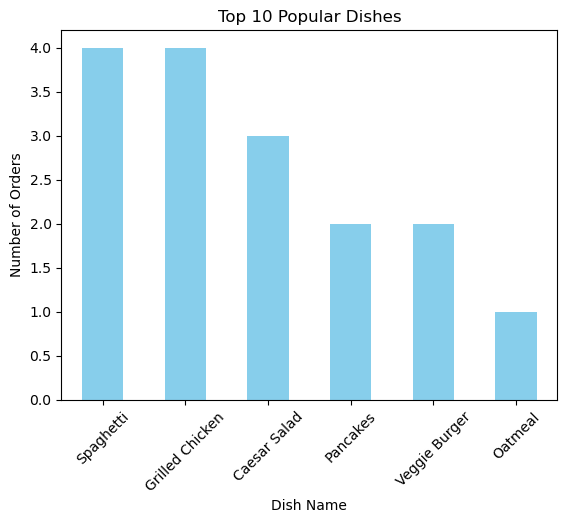

In [32]:
import matplotlib.pyplot as plt

popular_dishes.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

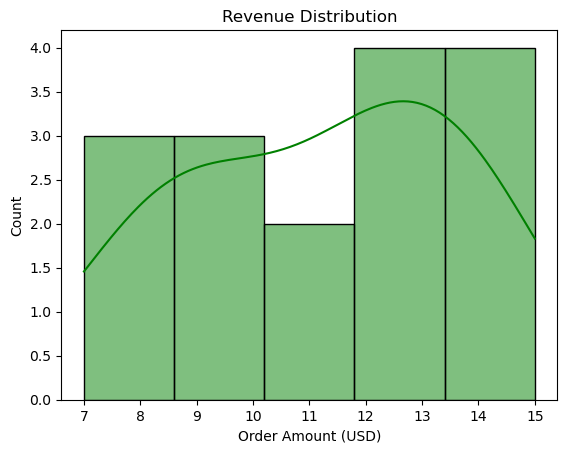

In [38]:
import seaborn as sns

sns.histplot(df['amount_(usd)'], kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Order Amount (USD)')
plt.show()

In [40]:
print(df.duplicated().sum())  # Should return 0

0


In [42]:
print(df.isnull().sum())  # Should show no critical missing valuesprint(df.head())  # Check that merged columns are included
print(df.info())  # Ensure all necessary fields are present
print(df[df.isnull().any(axis=1)])  # Check rows with null values
print(df.columns)  # Check column names
print(df['user_id'].nunique())  # Ensure all users are included
print(df['session_id'].nunique())  # Ensure sessions are merged

order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          0
session_id      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      16 non-null     int64  
 1   user_id       16 non-null     object 
 2   order_date    16 non-null     object 
 3   meal_type     16 non-null     object 
 4   dish_name     16 non-null     object 
 5   order_status  16 non-null     object 
 6   amount_(usd)  16 non-null     float64
 7   time_of_day   16 non-null     object 
 8   rating        16 non-null     float64
 9   session_id    16 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ KB
None
Empty DataFrame
Columns: [order_id, user_id, order_date, meal_type, dish_name, order_status, amount_(usd), time_of_day, r

In [44]:
# Save the cleaned and merged data to a CSV file
df.to_excel("cleaned_merged_data.xlsx", index=False)

In [46]:
# Save the cleaned and merged data to a CSV file
df.to_excel("C:\\Users\\Maggy\\OneDrive\\Desktop\\cleaned_merged_data.xlsx")